# Lab 3

## Exercício 1

### 1)

In [129]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt

random.seed(42)

#### a)

In [130]:
def gerar_padrao_aleatorio(n_bits):
    return [random.randint(0, 1) for _ in range(n_bits)]
print(gerar_padrao_aleatorio(8))

[0, 0, 1, 0, 0, 0, 0, 0]


#### b)

In [131]:
def random_search(target):
    n_bits = len(target)
    start = time.time()
    attempts = 0
    while True:
        guess = gerar_padrao_aleatorio(n_bits)
        attempts += 1
        if guess == target:
            break
    tempo_total = time.time() - start
    return attempts, tempo_total

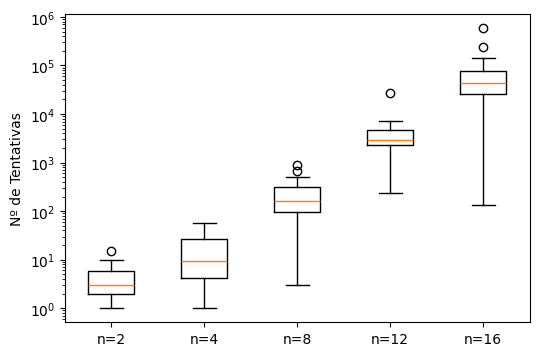

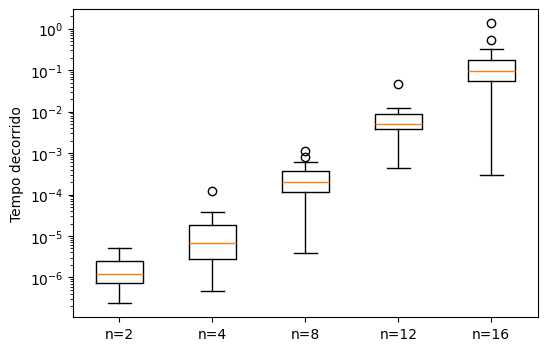

In [132]:
n_bits = [2, 4, 8, 12, 16]
attempts = {n: [] for n in n_bits}
elapsed = {n: [] for n in n_bits}

for n in n_bits:
    for _ in range(30):
        att, el = random_search(gerar_padrao_aleatorio(n))
        attempts[n].append(att)
        elapsed[n].append(el)
        

# Boxplot com whiskers
data = [attempts[n] for n in n_bits]
plt.figure(figsize=(6,4))
plt.boxplot(data, tick_labels=[f'n={n}' for n in n_bits])
plt.yscale('log')
plt.ylabel('Nº de Tentativas')
plt.show()
        
data = [elapsed[n] for n in n_bits]
plt.figure(figsize=(6,4))
plt.boxplot(data, tick_labels=[f'n={n}' for n in n_bits])
plt.yscale('log')
plt.ylabel('Tempo decorrido')
plt.show()

#### c)

In [133]:
def fitness(guess, target):
    return sum(1 for g, t in zip(guess, target) if g == t)

#### d)

In [134]:
def mutar(padrao):
    novo = padrao.copy()
    i = random.randrange(0,len(padrao))
    novo[i] = (novo[i] + 1) % 2
    return novo

print(mutar([0, 1, 0, 1, 1, 0, 0, 1]))

[0, 1, 0, 1, 1, 0, 1, 1]


In [135]:
def sucessive_mutations(target, max_mutations=1000):
    inicio = time.time()
    atual = gerar_padrao_aleatorio(len(target))
    fitness_atual = fitness(atual, target)
    historico = [fitness_atual]

    for _ in range(max_mutations):
        candidato = mutar(atual)
        fitness_candidato = fitness(candidato, target)

        if fitness_candidato > fitness_atual:
            atual = candidato
            fitness_atual = fitness_candidato

        historico.append(fitness_atual)

        if fitness_atual == len(target):
            break  # Atingiu o padrão correto

    tempo_total = time.time() - inicio
    return atual, fitness_atual, tempo_total, historico

Objetivo:      [0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0]
Solução final: [0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0]
Fitness final: 50
Tempo de execução: 0.00044345855712890625 segundos


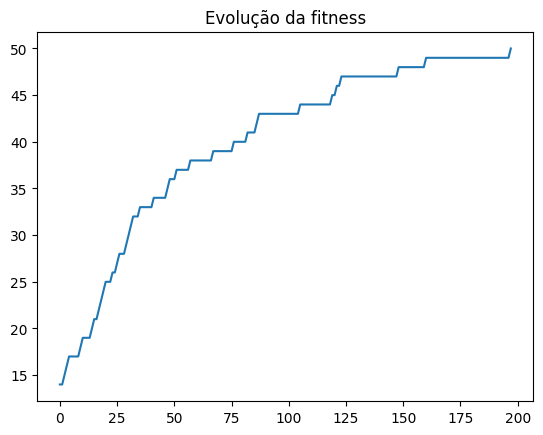

In [136]:
target = gerar_padrao_aleatorio(50)
print("Objetivo:     ", target)
resultado, fit, tempo, hist = sucessive_mutations(target)
print("Solução final:", resultado)
print("Fitness final:", fit)
print("Tempo de execução:", tempo, "segundos")
plt.plot(hist)
plt.title("Evolução da fitness")
plt.show()

Observação: Com a introdução da função de fitness e da mutação orientada, o tempo de execução reduziu-se drasticamente face à procura aleatória. Enquanto a primeira abordagem dependia apenas da sorte, esta nova solução utiliza informação sobre a qualidade(fitness) das tentativas permitindo convergir para a solução, alcançando o padrão correto de forma muito mais rápida e eficiente.
Variando o tamanho do target analisamos que deixamos de conseguir chegar à soluçao quando o tamanho supera os 200 bits, isso resolveria-se retirando a restriçao do numero maximo de 1000 mutações.

### 2)

In [137]:
def gerar_populacao(n_individuos, n_bits):
    return [gerar_padrao_aleatorio(n_bits) for _ in range(n_individuos)]

def melhorarPopulacao(target, tamanho_pop=100, frac_melhores=0.3, limite_estagnacao=100):
    inicio = time.time()
    n_bits = len(target)

    populacao = gerar_populacao(tamanho_pop, n_bits)

    melhor_fitness = 0
    sem_melhora = 0
    historico = []

    while(not(melhor_fitness == n_bits or sem_melhora >= limite_estagnacao)):

        # Avaliar fitness de cada indivíduo
        fitnesses = []
        for padrao in populacao:
            fitnesses.append(fitness(padrao, target))

        # Juntar indivíduos e fitness numa lista
        pares = list(zip(populacao, fitnesses))

        # Ordenar manualmente por fitness (maior primeiro)
        pares.sort(reverse=True, key=lambda x: x[1])

        # Selecionar os melhores (30%)
        n_melhores = int(tamanho_pop * frac_melhores)
        melhores_padroes = [pares[i][0] for i in range(n_melhores)]
        melhor_fit_atual = pares[0][1]

        historico.append(melhor_fit_atual)

        if melhor_fit_atual > melhor_fitness: # Para evitar a estagnação
            melhor_fitness = melhor_fit_atual
            sem_melhora = 0
        else:
            sem_melhora += 1

        # Criar nova população: 30% melhores + 70% mutados
        nova_pop = melhores_padroes.copy()
        while len(nova_pop) < tamanho_pop:
            x = random.choice(melhores_padroes)
            filho = mutar(x)
            nova_pop.append(filho)

        populacao = nova_pop

    tempo_total = time.time() - inicio
    return melhor_fitness, tempo_total, historico

Melhor fitness encontrado: 1000
Tempo de execução: 2.907499313354492 segundos


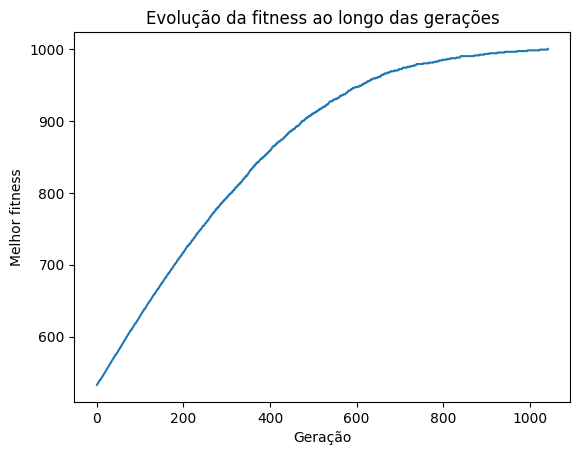

In [138]:
target = gerar_padrao_aleatorio(1000)

melhor, tempo, hist = melhorarPopulacao(target)

print("Melhor fitness encontrado:", melhor)
print("Tempo de execução:", tempo, "segundos")

plt.plot(hist)
plt.xlabel("Geração")
plt.ylabel("Melhor fitness")
plt.title("Evolução da fitness ao longo das gerações")
plt.show()

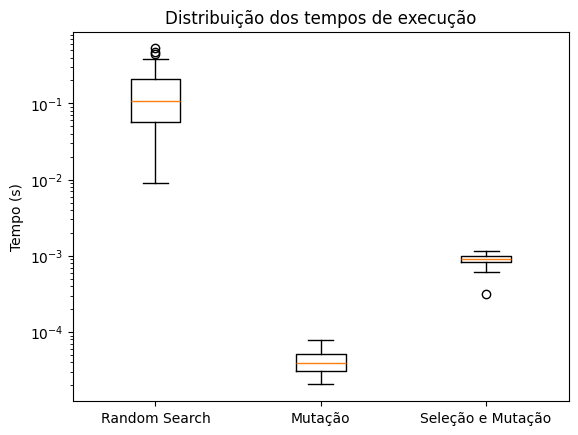

In [139]:
metodo = ["Random Search", "Mutação", "Seleção e Mutação"]
resultados = {m: [] for m in metodo}

for i in range(30):
    target = gerar_padrao_aleatorio(16)
    _, tempo = random_search(target)
    resultados["Random Search"].append(tempo)

for _ in range(30):
    target = gerar_padrao_aleatorio(16)
    _, _, tempo, _ = sucessive_mutations(target)
    resultados["Mutação"].append(tempo)

for _ in range(30):
    target = gerar_padrao_aleatorio(16)
    _, tempo, _ = melhorarPopulacao(target)
    resultados["Seleção e Mutação"].append(tempo)

data = [resultados[m] for m in metodo]
plt.boxplot(data, tick_labels=[f'{m}' for m in metodo])
plt.ylabel("Tempo (s)")
plt.title("Distribuição dos tempos de execução")
plt.yscale('log')
plt.show()

### 3)

In [140]:
def cruzar(pai, mae):
    i = random.randrange(0,len(pai))
    filho1 = pai[:i] + mae[i:]
    filho2 = mae[:i] + pai[i:]
    return filho1, filho2

In [141]:
def cruzarPopulacao(target, tamanho_pop=100, frac_melhores=0.3, limite_estagnacao=100):
    inicio = time.time()
    n_bits = len(target)

    populacao = gerar_populacao(tamanho_pop, n_bits)

    melhor_fitness = 0
    sem_melhora = 0
    historico = []

    while(not(melhor_fitness == n_bits or sem_melhora >= limite_estagnacao)):

        # Avaliar fitness de cada indivíduo
        fitnesses = []
        for padrao in populacao:
            fitnesses.append(fitness(padrao, target))

        # Juntar indivíduos e fitness numa lista
        pares = list(zip(populacao, fitnesses))

        # Ordenar manualmente por fitness (maior primeiro)
        pares.sort(reverse=True, key=lambda x: x[1])

        # Selecionar os melhores (30%)
        n_melhores = int(tamanho_pop * frac_melhores)
        melhores_padroes = [pares[i][0] for i in range(n_melhores)]
        melhor_fit_atual = pares[0][1]

        historico.append(melhor_fit_atual)

        if melhor_fit_atual > melhor_fitness: # Para evitar a estagnação
            melhor_fitness = melhor_fit_atual
            sem_melhora = 0
        else:
            sem_melhora += 1

        # Criar nova população: 30% melhores + 70% cruzados
        nova_pop = melhores_padroes.copy()
        while len(nova_pop) < tamanho_pop:
            x = random.choice(melhores_padroes)
            y = random.choice(melhores_padroes)
            filho1, filho2 = cruzar(x,y)
            nova_pop.append(filho1)
            nova_pop.append(filho2)

        populacao = nova_pop

    tempo_total = time.time() - inicio
    return melhor_fitness, tempo_total, historico

Melhor fitness encontrado: 47
Tempo de execução: 0.022907733917236328 segundos


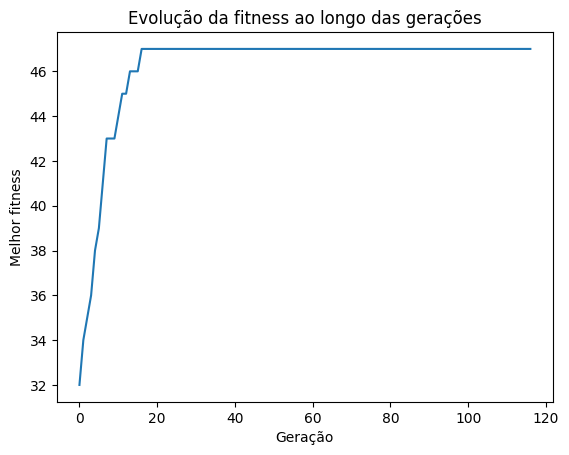

In [142]:
target = gerar_padrao_aleatorio(50)

melhor, tempo, hist = cruzarPopulacao(target)

print("Melhor fitness encontrado:", melhor)
print("Tempo de execução:", tempo, "segundos")

plt.plot(hist)
plt.xlabel("Geração")
plt.ylabel("Melhor fitness")
plt.title("Evolução da fitness ao longo das gerações")
plt.show()

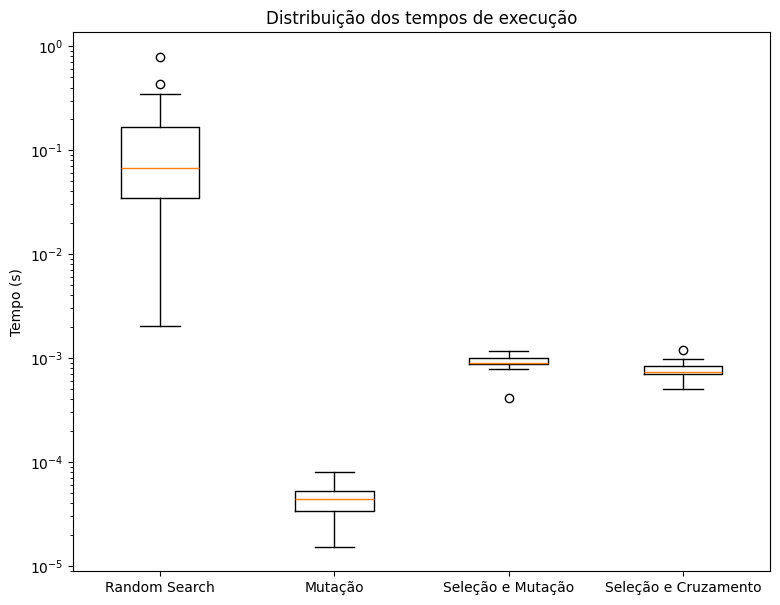

In [143]:
metodo = ["Random Search", "Mutação", "Seleção e Mutação", "Seleção e Cruzamento"]
resultados = {m: [] for m in metodo}

for i in range(30):
    target = gerar_padrao_aleatorio(16)
    _, tempo = random_search(target)
    resultados["Random Search"].append(tempo)

for _ in range(30):
    target = gerar_padrao_aleatorio(16)
    _, _, tempo, _ = sucessive_mutations(target)
    resultados["Mutação"].append(tempo)

for _ in range(30):
    target = gerar_padrao_aleatorio(16)
    _, tempo, _ = melhorarPopulacao(target)
    resultados["Seleção e Mutação"].append(tempo)
    
for _ in range(30):
    target = gerar_padrao_aleatorio(16)
    _, tempo, _ = cruzarPopulacao(target)
    resultados["Seleção e Cruzamento"].append(tempo)

data = [resultados[m] for m in metodo]
plt.figure(figsize=(9,7))
plt.boxplot(data, tick_labels=[f'{m}' for m in metodo])
plt.ylabel("Tempo (s)")
plt.title("Distribuição dos tempos de execução")
plt.yscale('log')
plt.show()

## Exercício 2

## Exercício 3
Na função de avaliação (fitting), em vez de somar 1 para cada posição igual no padrão de teste e no padrão objetivo, podiamos somar o módulo da diferença entre o valor do padrão de teste e do padrão objetivo, sendo que neste caso, quanto menor o valor devolvido pela função de avaliação, melhor, sendo que para o valor 0, ambos os padrões são iguais.

Na função de mutação, ...

Na função de cruzamento, não é necessária qualquer alteração, pois o método atualmente utilizado não tem em conta o tipo de informação presente nos padrões.